# exponentially  weighted moving average

>It’s a type of moving average that gives more importance (weight) to recent data points and less importance to older ones.



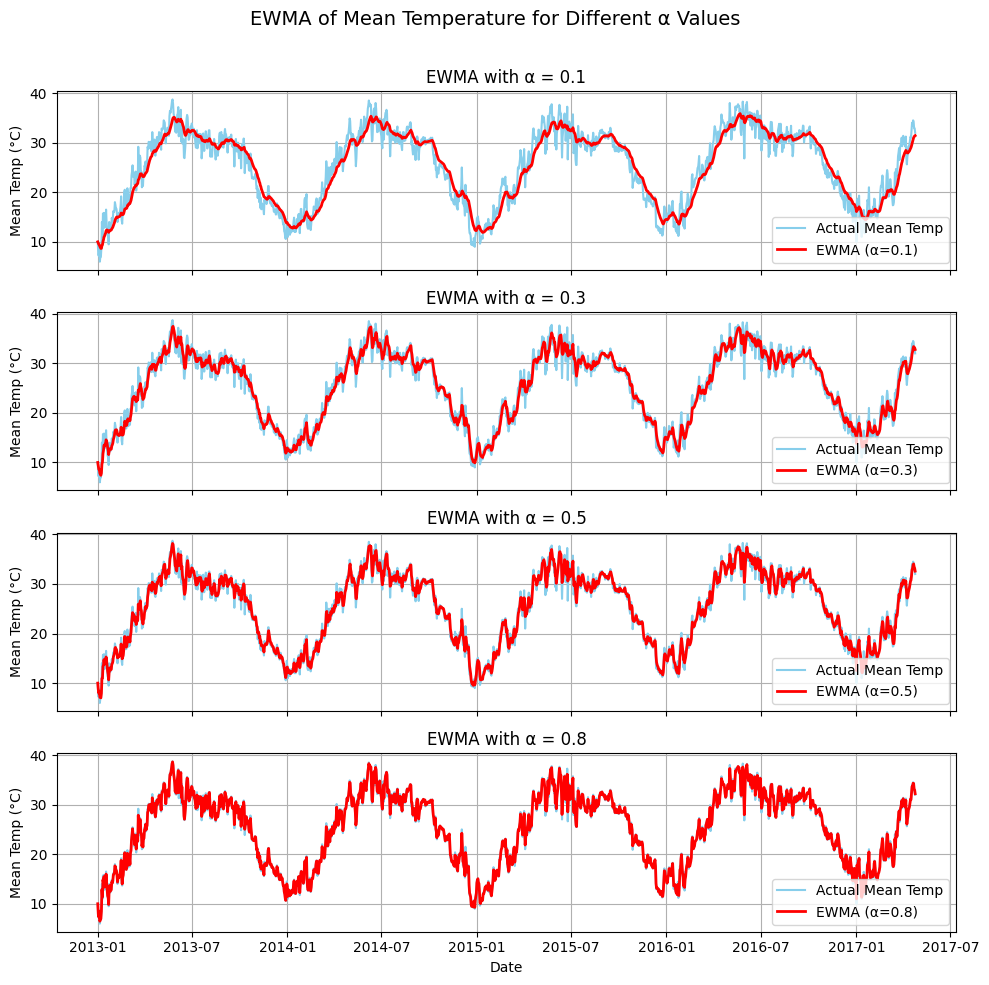

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DailyDelhiClimate.csv")

# Change the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date (just in case it's not in order)
df = df.sort_values('date')


alpha_values = [0.1, 0.3, 0.5, 0.8]


fig, axes = plt.subplots(len(alpha_values), 1, figsize=(10, 10), sharex=True)

for i, alpha in enumerate(alpha_values):
   
    df[f'EWMA_{alpha}'] = df['meantemp'].ewm(alpha=alpha, adjust=False).mean()

    
    axes[i].plot(df['date'], df['meantemp'], label='Actual Mean Temp', color='skyblue')

   
    axes[i].plot(df['date'], df[f'EWMA_{alpha}'], label=f'EWMA (α={alpha})', color='red', linewidth=2)


    axes[i].set_title(f"EWMA with α = {alpha}")
    axes[i].set_ylabel("Mean Temp (°C)")
    axes[i].legend()
    axes[i].grid(True)


plt.xlabel("Date")
plt.suptitle("EWMA of Mean Temperature for Different α Values", fontsize=14)


plt.tight_layout(rect=[0, 0, 1, 0.97])


plt.show()